# How to discover new particles

<h3>Learning goals</h3>
<ul>
    <li>Relativistic kinematics.
    <li>Standard model particles.
</ul>

<b>Background</b>

If you know the mass of a particle, most of the time you know <i>what that particle is</i>. However, there is no way to just build a single detector that gives you the mass. You need to be clever and make use of Special relativity, specifically <a href="http://en.wikipedia.org/wiki/Relativistic_mechanics">relativistic kinematics</a>.

To determine the mass ($m$) of a particle you need to know the 4-momenta of the particles ($\mathbf{P}$) that are detected after the collision: the energy ($E$), the momentum in the x direction ($p_x$), the momentum in the y direction ($p_y$), the momentum in the z direction ($p_z$).

$$\mathbf{P} = (E,p_x,p_y,p_z)$$


\begin{equation*} m = \sqrt{E^2-(p_x^2+p_y^2 + p_z^2)} \end{equation*}


<b>Let's code!</b>

Here is some sample code that reads in data from a <a href ="http://en.wikipedia.org/wiki/Monte_Carlo_method">Monte Carlo</a> simulation file from the <a href = "http://cms.web.cern.ch/">CMS experiment</a>. It loops over data from many different proton-proton collisions. 

For each collision, you can get the 4-momenta of the jets, muons, electrons, and photons produced in these collisions. 

In [1]:
import sys
sys.path.append("../tools/")
import cms_tools
import matplotlib.pyplot as plt
%matplotlib inline

infile = open("../data/mc_dy_1000collisions.dat", "r")
print "Reading in the data...."
collisions = cms_tools.get_collisions(infile)
    
print len(collisions)

for collision in collisions:
    
    jets,muons,electrons,photons,met = collision
    

Reading in the data....
1000


<h2><font color="red">Challenge!</font></h2>

Copy this sample code and use it to calculate the mass of the muons. Make a histogram of this quantity. 

<i>Hint!</i>

Make sure you do this for all the muons! Each collision can produce differing numbers of muons, so take care when you code this up.

Your histogram should look something like the following sketch. The value of the peak, should be the mass of the muon. <a href="http://en.wikipedia.org/wiki/Muon">Check your answer!</a> 

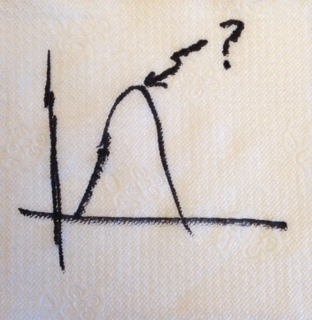

In [2]:
from IPython.display import Image
Image(filename='images/muons_sketch.jpeg')

In [3]:
# Your code here

______________

<b>Background</b>

Some particles are very unstable and decay (turn into) to two or more other particles. In fact, they can decay so quickly, that they never interact with your detector! Yikes!

However, we can reconstruct the parent particle (sometimes referred to as <b>the initial state particle</b>) and its 4-momentum by adding the 4-momenta of the child particles (sometimes referred to as <b>the decay products</b>). 

$$\mathbf{P_{\rm parent}} = \mathbf{P_{\rm child 0}} + \mathbf{P_{\rm child 1}} + \mathbf{P_{\rm child 2}} + ...$$

which breaks down into...

$$E_{\rm parent} = E_{\rm child 0} + E_{\rm child 1} + E_{\rm child 2} + ...$$

$$p_{\rm x parent} = p_{\rm x child 0} + p_{\rm x child 1} + p_{\rm x child 2} + ...$$

$$p_{\rm y parent} = p_{\rm y child 0} + p_{\rm y child 1} + p_{\rm y child 2} + ...$$

$$p_{\rm z parent} = p_{\rm z child 0} + p_{\rm y child 1} + p_{\rm z child 2} + ...$$


<h2><font color="red">Challenge!</font></h2>

Again, starting with the same sample code, add the 4-vectors of the muons and determine the mass and type of the parent particle. Make a histogram of the mass. 

<i>Hint!</i>

Some collisions produce more than one muon. You need to add the 4-vectors of the muons from each collision to determine the mass.

In [4]:
inFile = open("../data/mc_dy_1000collisions.dat", "r")
import cms_tools
print "Reading in the data...."
collisions = cms_tools.get_collisions(inFile)
    
print len(collisions)

count = 0
for collision in collisions:
    
    jets,muons,electrons,photons,met = collision
    
    count += 1
    
# To find the mass of a muon
    
    for muon in muons:
        energy,px,py,pz,charge = muon
         
# To find the 3 combinations of jets and the mass of the paricle that these jets came from
    
    numjets = []
    number = len(jets)
    numjets.append(number)
    
    for i in range (0,number):
        for j in range (i+1,number):
            for k in range (j+1, number):
                
                energy0,px0,py0,pz0,btag0 = jets[i]
                energy1,px1,py1,pz1,btag1 = jets[j]
                energy2,px2,py2,pz2,btag2 = jets[k]
                

Reading in the data....
1000


Your histogram should look something like the following sketch. The value of the peak, should be the mass of the parent particle. Check out the <a href="http://en.wikipedia.org/wiki/Standard_Model">standard model</a> to help you decide what the parent particle is. <a href="http://en.wikipedia.org/wiki/W_and_Z_bosons">Check your answer!</a> 

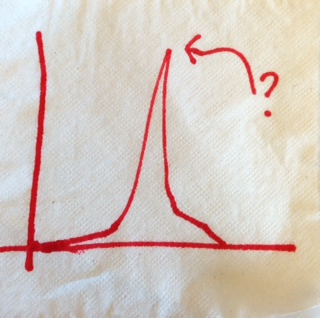

In [5]:
from IPython.display import Image
Image(filename='images/discovering_sketch_A.jpeg')

In [13]:
#Your code here

---------------------------------------------------------------------------------------------------------------------------------------------


<b>Background</b>

When a parent particle decays, it sometimes produces a spray of jets.  <a href="http://en.wikipedia.org/wiki/Jet_(particle_physics)">Jets</a>  are a cone of hadrons that are produced from a collision.  You can add together the 4-momenta of the jets to find the mass of the parent particle.   

$$\mathbf{P_{\rm parent}} = \mathbf{P_{\rm jet 0}} + \mathbf{P_{\rm jet 1}} + \mathbf{P_{\rm jet 2}} + ...$$

<h2><font color="red">Challenge!</font></h2>

Using the same sample code, add the 4-vectors of the jets and determine the mass and type of the parent particle. Make a histogram of the mass.

<i>Hint!</i>

Make sure you do this for all the combinations of jets! Each collision can produce differing numbers of jets, find all the three combinations of jets to find the parent particle.

In [34]:
inFile = open("../data/mc_dy_1000collisions.dat", "r")
import cms_tools
print "Reading in the data...."
collisions = cms_tools.get_collisions(inFile)
    
print len(collisions)
    
# To find the mass of a muon
    
for muon in muons:
    energy,px,py,pz,charge = muon
         
# To find the 3 combinations of jets and the mass of the paricle that these jets came from
    
masses = []
njets = []

mass_of_jets = []
count = 0

for collision in collisions:
    
    jets,muons,electrons,photons,met = collision
    
    njet=len(jets)
    
    njets.append(njet)
    
    for i in range (0,number):
        for j in range (i+1,number):
            for k in range (j+1, number):
               
                if njet == 3:
                
                    energy0,px0,py0,pz0,btag0 = jets[i]
                    energy1,px1,py1,pz1,btag1 = jets[j]
                    energy2,px2,py2,pz2,btag2 = jets[k]
                
                    energy = energy0 + energy1 + energy2
                    px = px0 + px1 + px2
                    py = py0 + py1 + py2
                    pz = pz0 + pz1 + pz2
                    btag = btag0 + btag1 + btag2
                
                    m = mass(energy,px,py,pz)
                    mass_of_jets.append(m)
                    

#plt.hist(jets,bins=100,range=(8,11))
#plt.xlabel('Mass of Jets [GeV]')
#plt.ylabel('# entries')         

Reading in the data....
1000


Your histogram should look something like the following sketch. The value of the peak should be the mass of the parent particle. <a href="http://en.wikipedia.org/wiki/Top_quark">Check your answer!</a> 

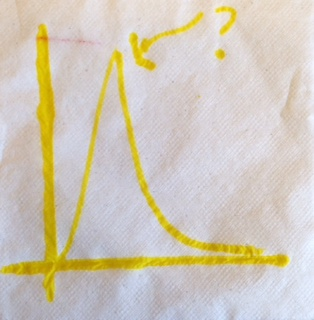

In [7]:
from IPython.display import Image
Image(filename='images/discovering_sketch_B.jpeg')

In [3]:
#your code here